Markers: 1:open trigger port;  8: press SPACE to start the experiment;  10: start/stop audio capturing; 5: each single trials;
2: ESCAPE or SPACE; 

In [1]:
from speech_pinyin_Ruijin.config import *
import glob
import mne
import numpy as np

2024-08-28 22:08:57 - Start Program

pre_all: Running from CMD.
common_dl.py: Using CUDA.


In [2]:
sid=1
folder=data_dir+str(sid)+'-*'
folder=os.path.normpath(glob.glob(folder)[0])
file=glob.glob(os.path.join(folder,'raw','*.edf'))[0]

In [3]:
raw = mne.io.read_raw_edf(file,preload=True)

In [4]:
use_channels=[str(i+1) for i in range(120)]
use_channels.append('Trigger')
raw.pick(use_channels)

<RawEDF | 20240828{DA2AFFC6-AC1E-4699-92A3-C055D5F24822} Data.edf, 121 x 5213200 (5213.2 s), ~4.70 GB, data loaded>

In [1]:
%matplotlib qt
raw.plot()

NameError: name 'raw' is not defined

![](img\1.png)

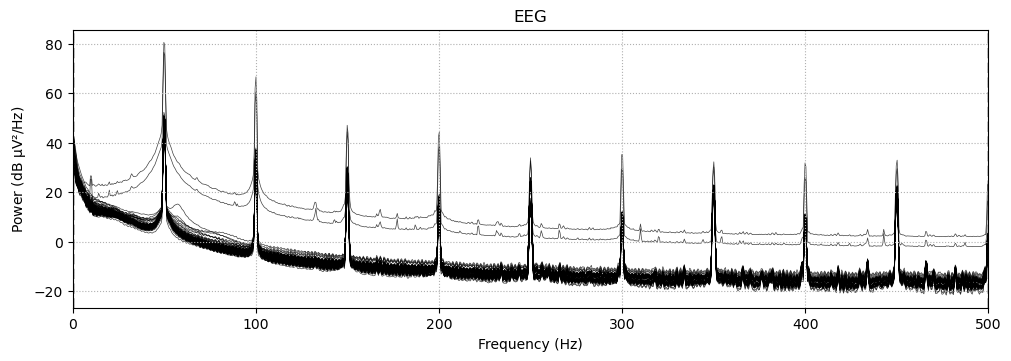

In [32]:
%matplotlib qt
raw.compute_psd().plot()

Why the regular oscillation in the PSD plot?

![](img\4.png)

In [5]:
raw.filter(0.5,495)

<RawEDF | 20240828{DA2AFFC6-AC1E-4699-92A3-C055D5F24822} Data.edf, 121 x 5213200 (5213.2 s), ~4.70 GB, data loaded>

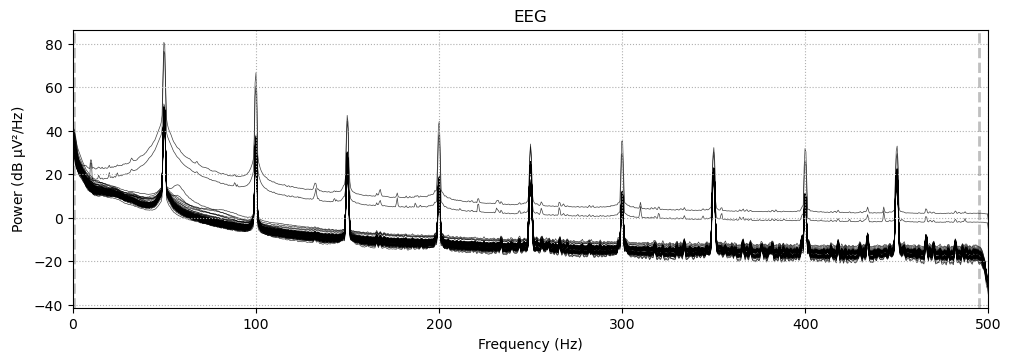

In [34]:
raw.compute_psd().plot()

Default notch can't eliminate the line noise completely, as shown in below. So, define new notch width=3hz: 

![](img\3.png)

In [6]:
frequency=np.arange(50, 500, 50).tolist()
notch_widths=np.asarray([3,]*len(frequency))
raw.notch_filter(freqs=frequency,notch_widths=notch_widths)

<RawEDF | 20240828{DA2AFFC6-AC1E-4699-92A3-C055D5F24822} Data.edf, 121 x 5213200 (5213.2 s), ~4.70 GB, data loaded>

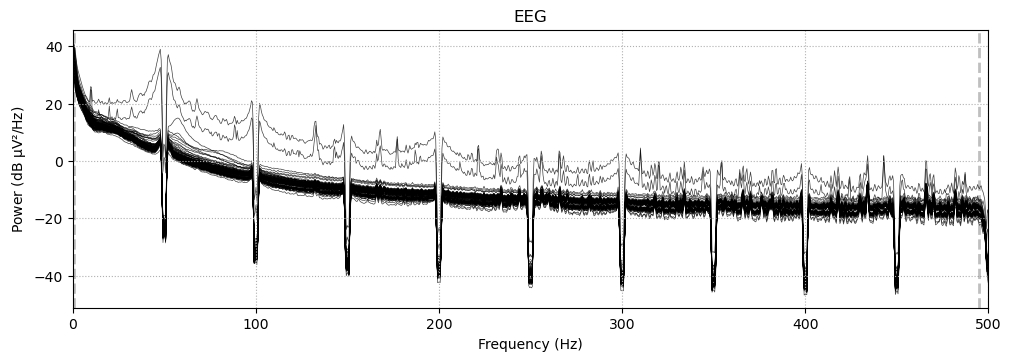

In [36]:
raw.compute_psd().plot() # 3Hz notch width seems not enough; about a width of 10hz was contaminated by the line noise.

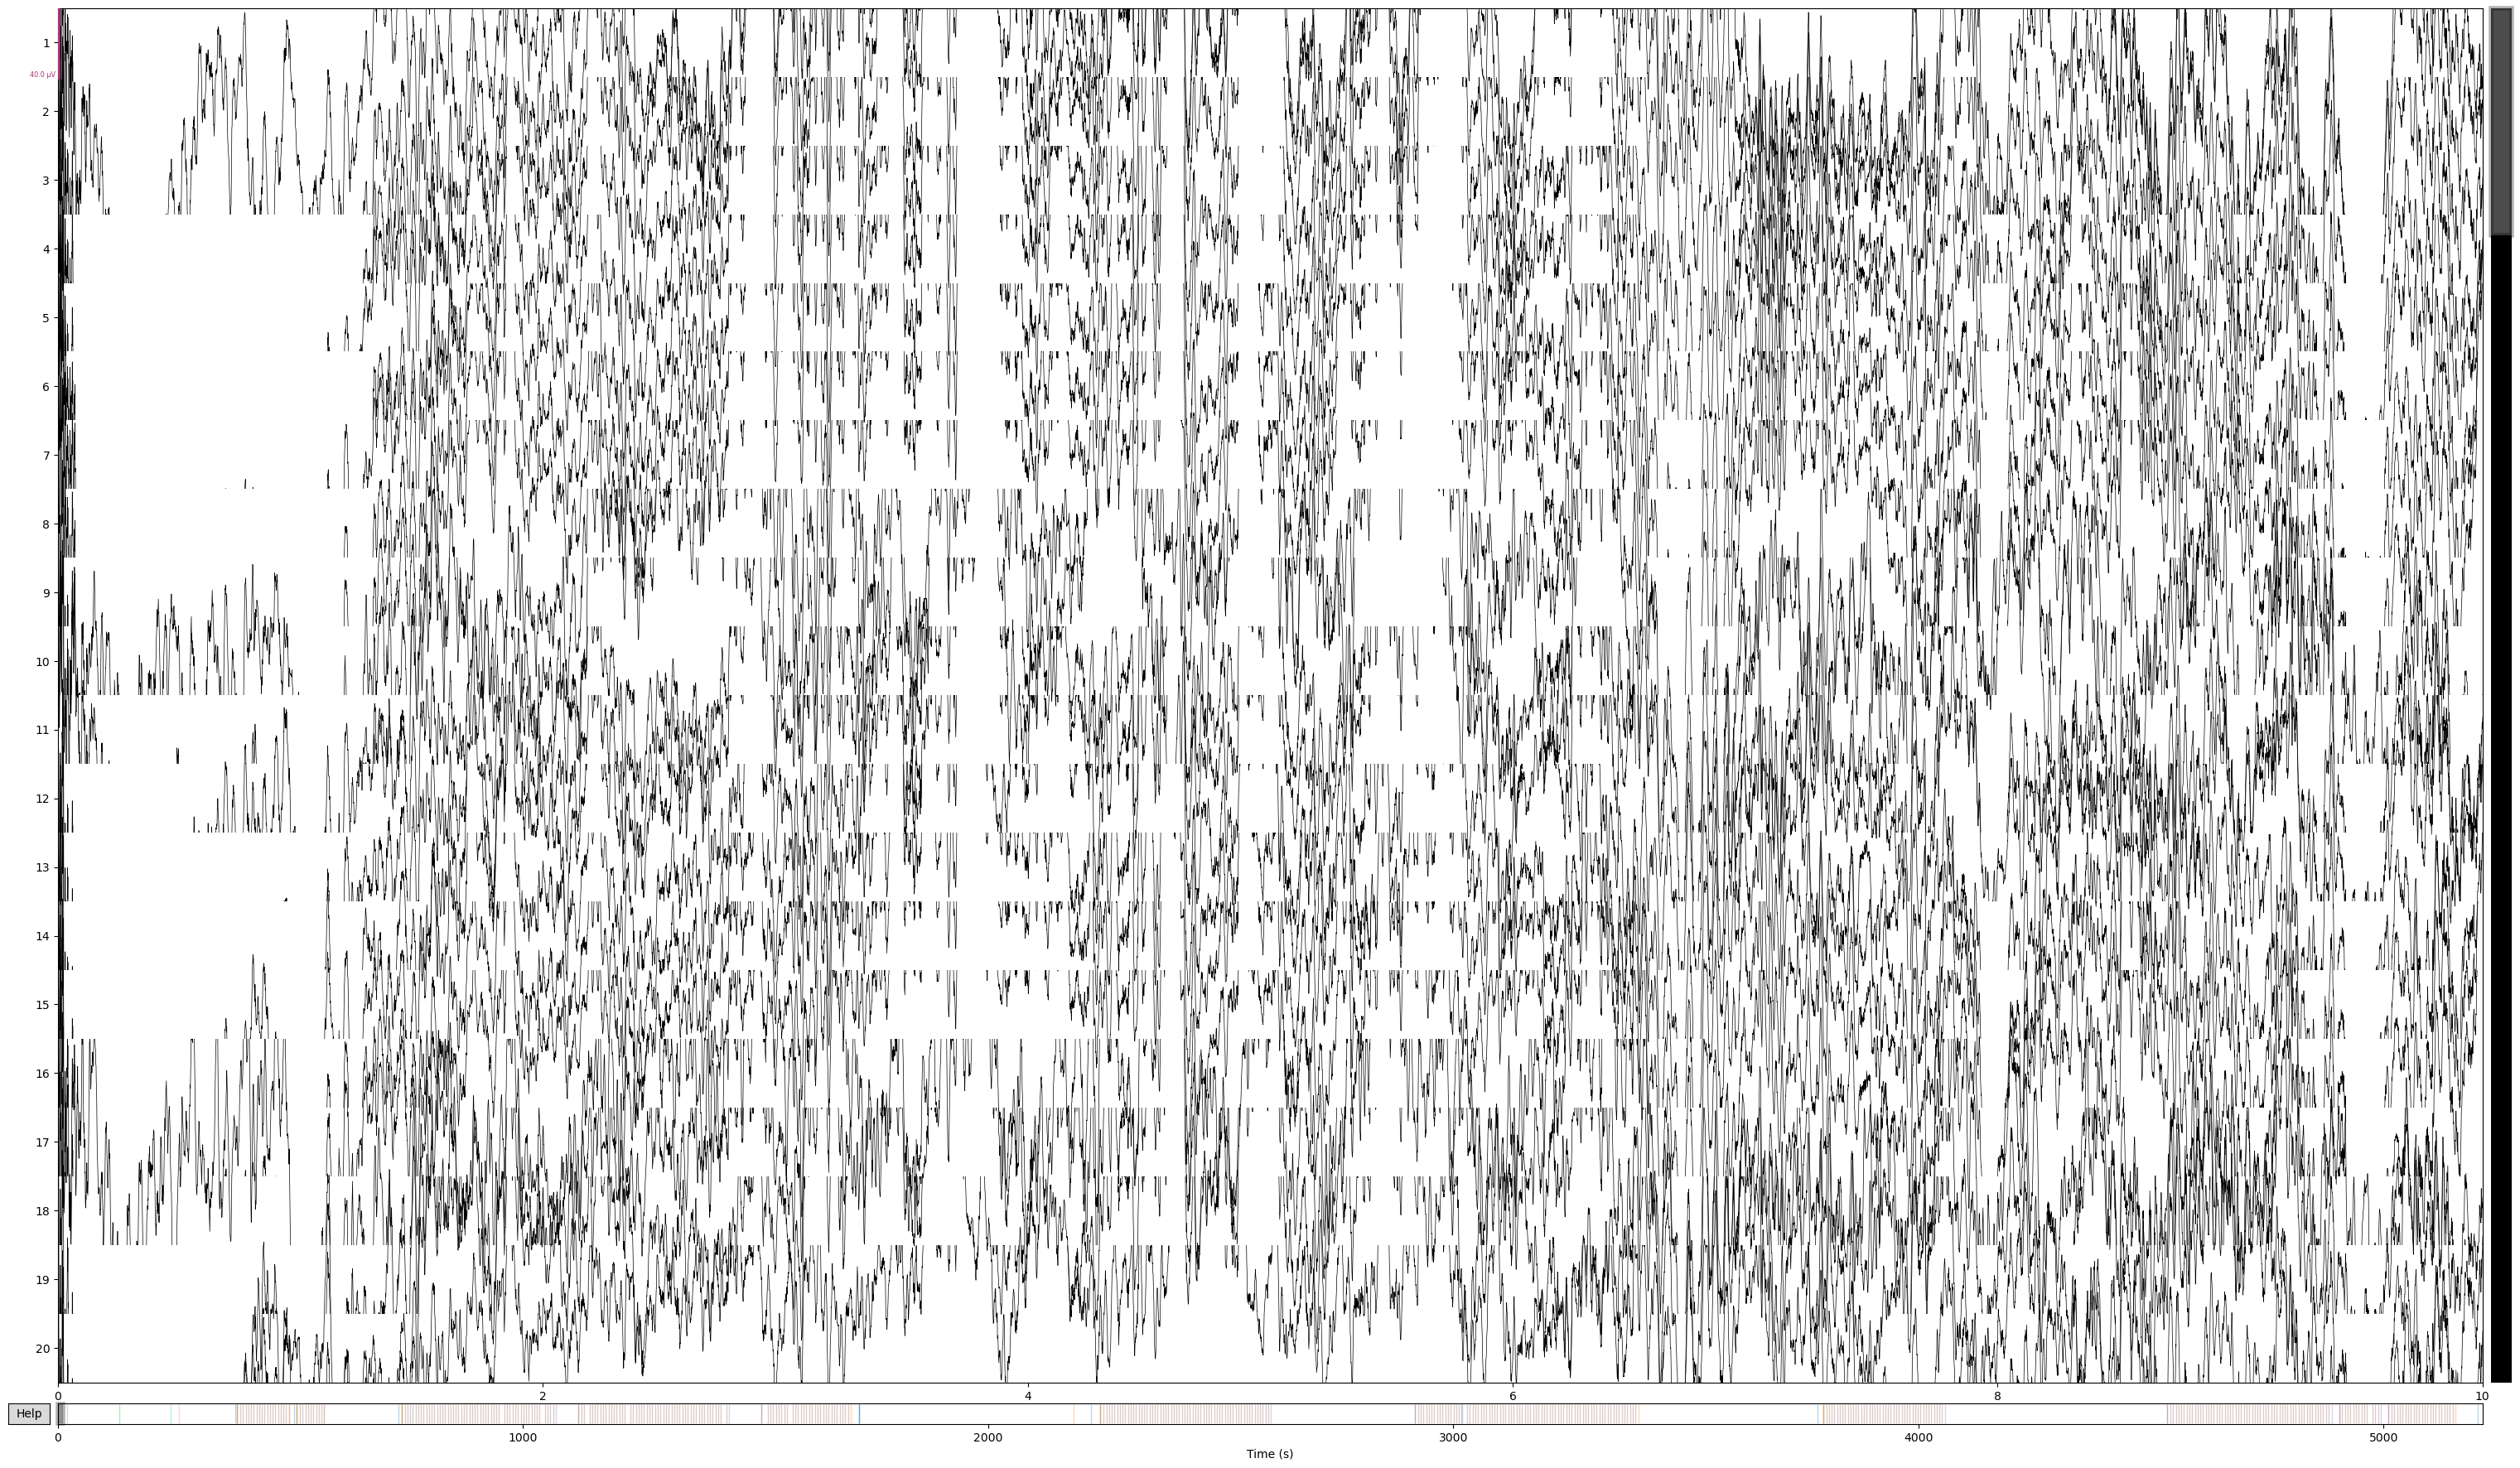

In [38]:
raw.plot()

![](img\2.png)

In [39]:
annotations=raw.annotations

In [44]:
annotations[1]

OrderedDict([('onset', 132.094),
             ('duration', 0.0),
             ('description', '120 SEEG bipolar'),
             ('orig_time',
              datetime.datetime(2024, 8, 28, 8, 33, 34, tzinfo=datetime.timezone.utc))])

In [47]:
from utils.util_MNE import keep_annotation
annotations=keep_annotation(annotations,['1', '8', '10', '5', '2'])

In [14]:
# session 1: start: 626s, end: 1886 
# pause recording for 461s
raw1=raw.copy().crop(tmin=736, tmax=1706)
filename=folder.replace("\\", "/")+'/processed/session1.fif'
raw1.save(filename,overwrite=True)

In [16]:
raw2=raw.copy().crop(tmin=2235 ,tmax=3401)
filename=folder.replace("\\", "/")+'/processed/session2.fif'
raw2.save(filename,overwrite=True)

In [17]:
raw3=raw.copy().crop(tmin=3790 ,tmax=5157)
filename=folder.replace("\\", "/")+'/processed/session3.fif'
raw3.save(filename,overwrite=True)

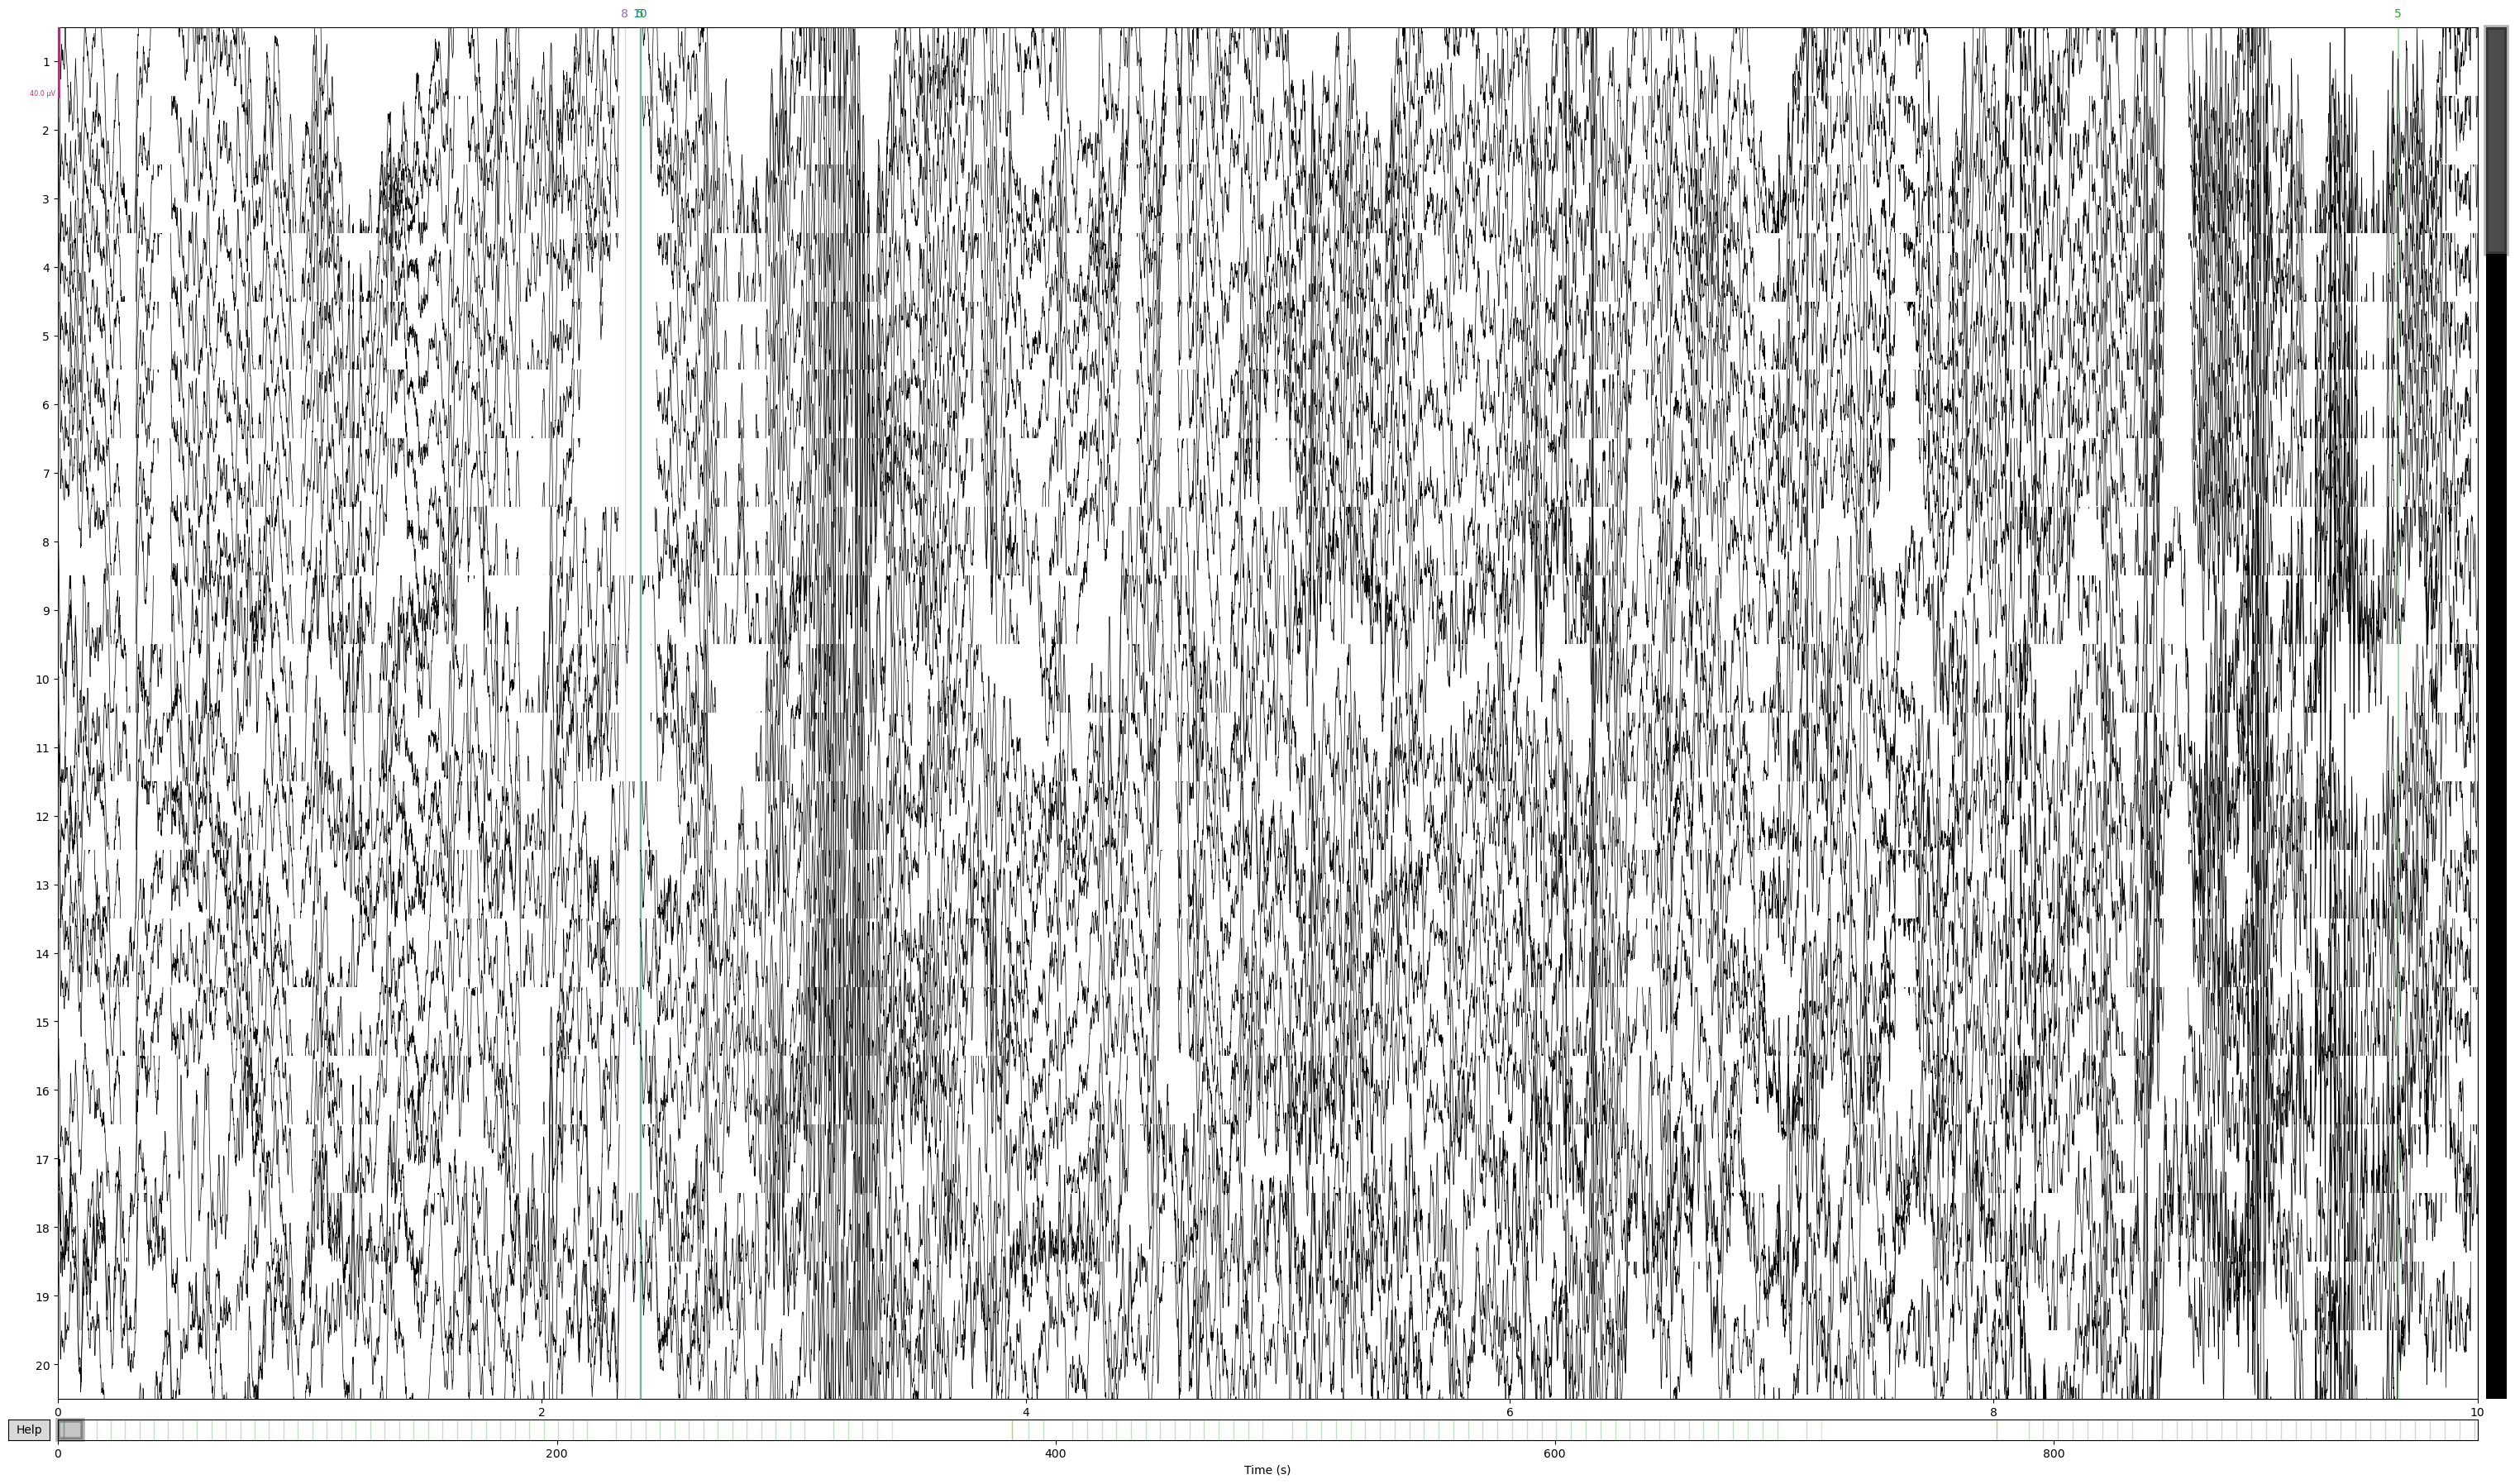

In [10]:
%matplotlib qt
raw1.plot()

### parse the Matlab data

In [77]:
import hdf5storage
files=['name_202408280901','name_202408280930','name_202408280959']
infos=[]
for file in files:
    tmp=folder.replace("\\", "/")+'/raw/matlab/result/'+file+'/prompt_shown.mat'
    tmp=hdf5storage.loadmat(tmp)
    tmp=tmp['prompt_shown'][0]
    info=[a[0] for a in tmp]
    infos.append(info)
info1, info2, info3=infos